<h1> Different ways for creating a graph </h1>

 The design of :class:`DGLGraph` was influenced by other graph libraries. You  can create a graph from networkx and convert it into a :class:`DGLGraph` and  vice versa.

In [1]:
import networkx as nx
import dgl

Using backend: pytorch


C:\Users\ME\Anaconda3\envs\tf-gpu5\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


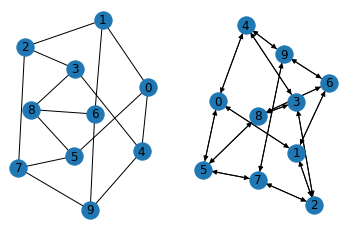

In [2]:
g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()

In [3]:
dir(g_dgl)

['__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_num_edges',
 '_batch_num_nodes',
 '_canonical_etypes',
 '_dsttypes_invmap',
 '_edge_frames',
 '_etype2canonical',
 '_etypes',
 '_etypes_invmap',
 '_find_etypes',
 '_get_e_repr',
 '_get_n_repr',
 '_graph',
 '_idtype_str',
 '_init',
 '_is_unibipartite',
 '_node_frames',
 '_ntypes',
 '_pop_e_repr',
 '_pop_n_repr',
 '_reset_cached_info',
 '_set_e_repr',
 '_set_n_repr',
 '_srctypes_invmap',
 'add_edge',
 'add_edges',
 'add_nodes',
 'add_self_loop',
 'adj',
 'adjacency_matrix',
 'adjacency_matrix_scipy',
 'all_edges',
 'apply_edges',
 'apply_node

In [6]:
g_dgl.nodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
g_dgl.adjacency_matrix()

tensor(indices=tensor([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6,
                        6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9],
                       [1, 4, 5, 0, 2, 6, 1, 3, 7, 2, 4, 8, 0, 3, 9, 0, 7, 8, 1,
                        8, 9, 2, 5, 9, 3, 5, 6, 4, 6, 7]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                      1., 1.]),
       size=(10, 10), nnz=30, layout=torch.sparse_coo)

In [11]:
g_dgl.all_edges()

(tensor([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,
         8, 8, 8, 9, 9, 9]),
 tensor([1, 4, 5, 0, 2, 6, 1, 3, 7, 2, 4, 8, 0, 3, 9, 0, 7, 8, 1, 8, 9, 2, 5, 9,
         3, 5, 6, 4, 6, 7]))

In [12]:
g_dgl.batch_num_edges()

tensor([30])

In [18]:
g_dgl.batch_num_nodes()

tensor([10])

In [21]:
g_dgl.batch_size

1

In [14]:
g_dgl.cpu()

Graph(num_nodes=10, num_edges=30,
      ndata_schemes={}
      edata_schemes={})

In [17]:
g_dgl.device

device(type='cpu')

In [23]:
g_dgl.dstnodes()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
g_dgl.edge_id([0,1])

TypeError: edge_id() missing 1 required positional argument: 'v'

In [36]:
g_dgl.edge_subgraph()

TypeError: edge_subgraph() missing 1 required positional argument: 'edges'

In [37]:
g_dgl.num_edges()

30

In [38]:
g_dgl.num_nodes()

10

In [40]:
g_dgl.number_of_edges()

30

In [41]:
g_dgl.number_of_nodes()

10

In [42]:
g_dgl.num_src_nodes()

10

In [43]:
g_dgl.num_dst_nodes()

10

In [44]:
g_dgl.in_degrees()

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
g_dgl.out_degrees()

###############################################################################
 There are many ways to construct a :class:`DGLGraph`. Below are the allowed data types ordered by our recommendataion.
 * A pair of arrays ``(u, v)`` storing the source and destination nodes respectively.
  They can be numpy arrays or tensor objects from the backend framework.
 * ``scipy`` sparse matrix representing the adjacency matrix of the graph to be constructed.
 * ``networkx`` graph object.
* A list of edges in the form of integer pairs.

 The examples below construct the same star graph via different methods.

 :class:`DGLGraph` nodes are a consecutive range of integers between 0 and
 :func:`number_of_nodes() <DGLGraph.number_of_nodes>`. 
 :class:`DGLGraph` edges are in order of their additions. Note that
 edges are accessed in much the same way as nodes, with one extra feature:
 *edge broadcasting*.


In [46]:
import torch as th
import numpy as np
import scipy.sparse as spp

# Create a star graph from a pair of arrays (using ``numpy.array`` works too).
u = th.tensor([0, 0, 0, 0, 0])
v = th.tensor([1, 2, 3, 4, 5])
star1 = dgl.DGLGraph((u, v))

C:\Users\ME\Anaconda3\envs\tf-gpu5\lib\site-packages\dgl\base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


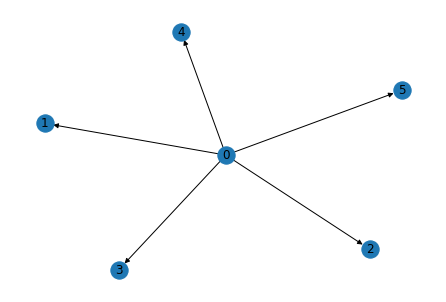

In [47]:
nx.draw(star1.to_networkx(), with_labels=True)
plt.show()

In [48]:
# Create the same graph from a scipy sparse matrix (using ``scipy.sparse.csr_matrix`` works too).
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star3 = dgl.DGLGraph(adj)

In [49]:
adj

<1x6 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in COOrdinate format>

In [50]:
# You can also create a graph by progressively adding more nodes and edges.
# Although it is not as efficient as the above constructors, it is suitable
# for applications where the graph cannot be constructed in one shot.

g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([0, 0])
g.add_edges(src, dst)

C:\Users\ME\Anaconda3\envs\tf-gpu5\lib\site-packages\dgl\base.py:45: DGLWarning: DGLGraph.add_edge is deprecated. Please use DGLGraph.add_edges
  return warnings.warn(message, category=category, stacklevel=1)


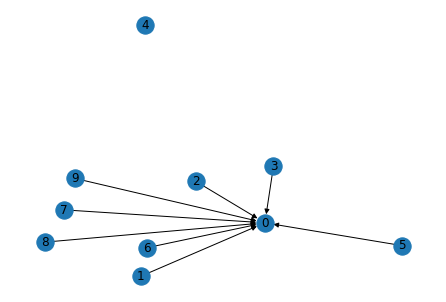

In [51]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

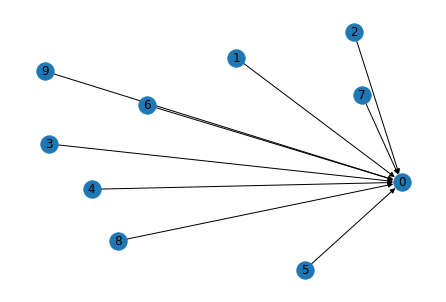

In [53]:
# Edge broadcasting will do star graph in one go!
g = dgl.DGLGraph()
g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

<h3> Assigning a feature </h3>
 You can also assign features to nodes and edges of a :class:`DGLGraph`.  The features are represented as dictionary of names (strings) and tensors, called **fields**.
The following code snippet assigns each node a vector (len=3).
.. note::
DGL aims to be framework-agnostic, and currently it supports PyTorch and MXNet tensors. The following examples use PyTorch only.

In [54]:
import dgl
import torch as th

x = th.randn(10, 3)
g.ndata['x'] = x

In [55]:
# :func:`ndata <DGLGraph.ndata>` is a syntax sugar to access the feature
# data of all nodes. To get the features of some particular nodes, slice out
# the corresponding rows.

g.ndata['x'][0] = th.zeros(1, 3)
g.ndata['x'][[0, 1, 2]] = th.zeros(3, 3)
g.ndata['x'][th.tensor([0, 1, 2])] = th.randn((3, 3))

Assigning edge features is similar to that of node features, except that you can also do it by specifying endpoints of the edges.

In [56]:
g.edata['w'] = th.randn(9, 2)

# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = th.randn(1, 2)
g.edata['w'][[0, 1, 2]] = th.zeros(3, 2)
g.edata['w'][th.tensor([0, 1, 2])] = th.zeros(3, 2)

# You can get the edge ids by giving endpoints, which are useful for accessing the features.
g.edata['w'][g.edge_id(1, 0)] = th.ones(1, 2)                   # edge 1 -> 0
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = th.ones(3, 2)  # edges [1, 2, 3] -> 0
# Use edge broadcasting whenever applicable.
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = th.ones(3, 2)          # edges [1, 2, 3] -> 0


C:\Users\ME\Anaconda3\envs\tf-gpu5\lib\site-packages\dgl\base.py:45: DGLWarning: DGLGraph.edge_id is deprecated. Please use DGLGraph.edge_ids.
  return warnings.warn(message, category=category, stacklevel=1)


In [57]:
g.ndata

{'x': tensor([[ 1.0459, -0.3609, -0.3154],
        [ 1.6507,  0.5227, -0.3640],
        [-0.2451, -0.9228, -1.0275],
        [ 2.0420, -0.8830,  0.0905],
        [ 0.9995,  0.3330,  0.4025],
        [ 1.1978,  0.7521,  0.1340],
        [-0.0441, -0.4314, -0.0895],
        [-1.8624, -0.1121,  1.2000],
        [ 2.0438,  2.6996,  0.1208],
        [-0.3440, -0.9564, -1.2033]])}

In [58]:
g.edata

{'w': tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [-0.4022, -1.9883],
        [ 0.0296, -1.1296],
        [-1.0236,  0.4127],
        [-1.1900, -1.2375],
        [ 2.1469,  0.0331],
        [ 0.7796, -0.6841]])}

After assignments, each node or edge field will be associated with a scheme containing the shape and data type (dtype) of its field value.

In [59]:
print(g.node_attr_schemes())

{'x': Scheme(shape=(3,), dtype=torch.float32)}


In [60]:
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())

{'x': Scheme(shape=(4,), dtype=torch.float32)}


You can also remove node or edge states from the graph. This is particularly useful to save memory during inference

In [61]:
g.ndata.pop('x')
g.edata.pop('w')

tensor([[ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [ 1.0000,  1.0000],
        [-0.4022, -1.9883],
        [ 0.0296, -1.1296],
        [-1.0236,  0.4127],
        [-1.1900, -1.2375],
        [ 2.1469,  0.0331],
        [ 0.7796, -0.6841]])

<h3> Working with multigraphs </h3>
Many graph applications need parallel edges, which class:DGLGraph supports by default.


In [62]:
g_multi = dgl.DGLGraph()
g_multi.add_nodes(10)
g_multi.ndata['x'] = th.randn(10, 2)

g_multi.add_edges(list(range(1, 10)), 0)
g_multi.add_edge(1, 0) # two edges on 1->0

g_multi.edata['w'] = th.randn(10, 2)
g_multi.edges[1].data['w'] = th.zeros(1, 2)
print(g_multi.edges())

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 1]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


 An edge in multigraph cannot be uniquely identified by using its incident nodes :math:`u` and :math:`v`; query their edge IDs use ``edge_id`` interface.

In [64]:
_, _, eid_10 = g_multi.edge_id(1, 0, return_uv=True)
g_multi.edges[eid_10].data['w'] = th.ones(len(eid_10), 2)
print(g_multi.edata['w'])

tensor([[ 1.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 1.8617, -1.7559],
        [ 1.2626, -0.5878],
        [-0.6657,  0.5298],
        [-0.2641,  0.8174],
        [ 0.1816,  2.3540],
        [ 0.7960,  1.8811],
        [-0.2694, -1.3057],
        [ 1.0000,  1.0000]])


note:: * Updating a feature of different schemes raises the risk of error on individual nodes (or node subset).